In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore",category=UserWarning)
sns.set_style("whitegrid")
%matplotlib inline
np.random.seed(12)

In [26]:
df = pd.read_csv("Data_Mining_Dataset.csv")
df.head(5)

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [27]:
data=df.copy()
data.describe()

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,1.0,34131.000000,34627.000000,0.0,0.0
mean,111372787.0,0.630248,4.584573,NaN,NaN
std,NaN,13.215775,0.735653,NaN,NaN
min,111372787.0,0.000000,1.000000,NaN,NaN
25%,111372787.0,0.000000,4.000000,NaN,NaN
50%,111372787.0,0.000000,5.000000,NaN,NaN
75%,111372787.0,0.000000,5.000000,NaN,NaN
max,111372787.0,814.000000,5.000000,NaN,NaN


Based on the descriptive statistics above, we see the following:
- Average review score of 4.58, with low standard deviation
    - Most review are positive from 2nd quartile onwards
- The average for number of reviews helpful is 0.6 but high standard deviation
    - The range of most reviews will be between 0-13 people finding helpful bcz Standard deviation is 13
- The most helpful review was helpful to 814 people

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
id                      34660 non-null object
name                    27900 non-null object
asins                   34658 non-null object
brand                   34660 non-null object
categories              34660 non-null object
keys                    34660 non-null object
manufacturer            34660 non-null object
reviews.date            34621 non-null object
reviews.dateAdded       24039 non-null object
reviews.dateSeen        34660 non-null object
reviews.didPurchase     1 non-null object
reviews.doRecommend     34066 non-null object
reviews.id              1 non-null float64
reviews.numHelpful      34131 non-null float64
reviews.rating          34627 non-null float64
reviews.sourceURLs      34660 non-null object
reviews.text            34659 non-null object
reviews.title           34655 non-null object
reviews.userCity        0 non-null float64
reviews.userProvince    0

Based on the information above:
- Not every category have maximum number of values in comparison to total number of values
- reviews.text category has minimum missing data.
- We need to clean up the name column by referencing asins (unique products) since we have around 7000 missing values

In [29]:
data["asins"].unique()

array(['B01AHB9CN2', 'B00VINDBJK', 'B005PB2T0S', 'B002Y27P3M',
       'B01AHB9CYG', 'B01AHB9C1E', 'B01J2G4VBG', 'B00ZV9PXP2',
       'B0083Q04TA', 'B018Y229OU', 'B00REQKWGA', 'B00IOYAM4I',
       'B018T075DC', nan, 'B00DU15MU4', 'B018Y225IA', 'B005PB2T2Q',
       'B018Y23MNM', 'B00OQVZDJM', 'B00IOY8XWQ', 'B00LO29KXQ',
       'B00QJDU3KY', 'B018Y22C2Y', 'B01BFIBRIE', 'B01J4ORNHU',
       'B018SZT3BK', 'B00UH4D8G2', 'B018Y22BI4', 'B00TSUGXKE',
       'B00L9EPT8O,B01E6AO69U', 'B018Y23P7K', 'B00X4WHP5E', 'B00QFQRELG',
       'B00LW9XOJM', 'B00QL1ZN3G', 'B0189XYY0Q', 'B01BH83OOM',
       'B00BFJAHF8', 'B00U3FPN4U', 'B002Y27P6Y', 'B006GWO5NE',
       'B006GWO5WK'], dtype=object)

In [30]:
asins_unique = len(data["asins"].unique())
print("Number of Unique ASINs: " + str(asins_unique))

Number of Unique ASINs: 42


**Visualizing the distributions of numerical variables:**

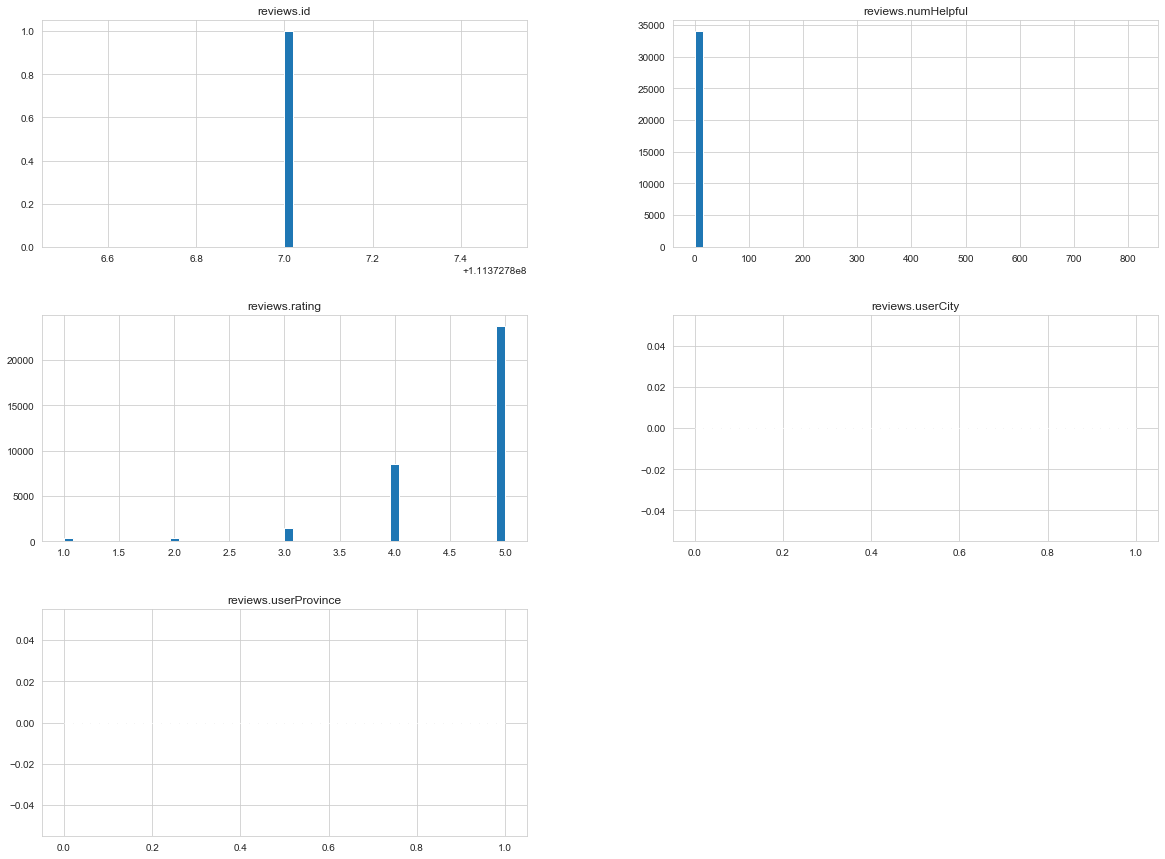

In [31]:
data.hist(bins=50,figsize=(20,15))
plt.show()

Based on the distributions above:
- reviews.numHelpful: Outliers in this case are valuable, so we may want to weight reviews that had more than 50+ people who find them helpful
- reviews.rating: Majority of examples were rated highly. There is twice amount of 5 star ratings than the others ratings combined

# Split into Train/Test

In [32]:
from sklearn.model_selection import StratifiedShuffleSplit
dataAfter = data.dropna(subset=["reviews.rating"])
dataAfter["reviews.rating"] = dataAfter["reviews.rating"].astype(int)

In [33]:
split = StratifiedShuffleSplit(n_splits=5, test_size=0.2)
for train_index, test_index in split.split(dataAfter, dataAfter["reviews.rating"]): 
    strat_train = dataAfter.reindex(train_index)
    strat_test = dataAfter.reindex(test_index)

**Check whether datasets were stratified proportionately.**

In [34]:
len(strat_train)

27701

In [35]:
strat_train["reviews.rating"].value_counts()/len(strat_train)

5.0    0.686437
4.0    0.247175
3.0    0.042742
1.0    0.011985
2.0    0.010722
Name: reviews.rating, dtype: float64

In [36]:
len(strat_test)

6926

In [37]:
strat_test["reviews.rating"].value_counts()/len(strat_test)

5.0    0.684811
4.0    0.244152
3.0    0.045192
2.0    0.015016
1.0    0.009818
Name: reviews.rating, dtype: float64

# Data Exploration (Training Set)

In [38]:
reviews = strat_train.copy()
reviews.head(2)

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
30050,AV1YE_muvKc47QAVgpwE,NaN,B00U3FPN4U,Amazon Fire Tv,"Back To College,College Electronics,College Tv...","848719057492,amazonfiretv/51454342,amazonfiret...",Amazon,2016-07-09T00:00:00.000Z,2017-09-20T05:35:59Z,"2017-08-25T22:40:32.187Z,2017-08-19T09:25:25.8...",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/4370400/review...,It's a great delivery vehicle for all your Ama...,Fast with lots of app support,NaN,NaN,Orion76
32823,AV1YE_muvKc47QAVgpwE,NaN,B00U3FPN4U,Amazon Fire Tv,"Back To College,College Electronics,College Tv...","848719057492,amazonfiretv/51454342,amazonfiret...",Amazon,2016-09-09T00:00:00.000Z,2017-09-20T05:35:53Z,"2017-08-25T22:05:28.182Z,2017-08-19T09:35:42.3...",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/4370400/review...,This is one for the living room. And my other ...,Great,NaN,NaN,SweetNLow


## reviews.rating / ASINs

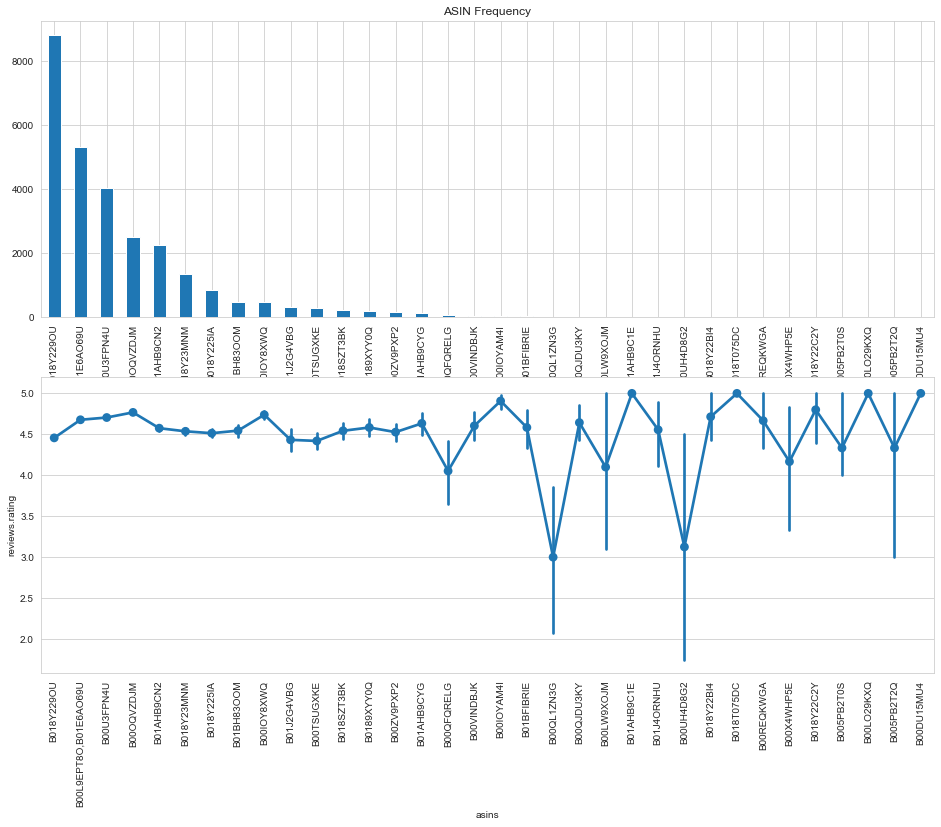

In [39]:
asinsc = reviews["asins"].value_counts().index
plt.subplots(2,1,figsize=(16,12))
plt.subplot(2,1,1)
reviews["asins"].value_counts().plot(kind="bar", title="ASIN Frequency")
plt.subplot(2,1,2)
sns.pointplot(x="asins", y="reviews.rating", order=asinsc, data=reviews)
plt.xticks(rotation=90)
plt.show()

- The most frequently reviewed products have their average review ratings in the 4.5 - 4.8 range, with little variance
- Although there is a slight inverse relationship between the ASINs frequency level and average review ratings for the first 4 ASINs, this relationship is not significant since the average review for the first 4 ASINs are rated between 4.5 - 4.8, which is considered good overall reviews
- For ASINs with lower frequencies as shown on the bar graph, we see that their corresponding average review ratings on the graph has significantly higher variance as shown by the length of the vertical lines. As a result, we suggest that, the average review ratings for ASINs with lower frequencies are not significant for our analysis due to high variance
- Due to the lower frequencies for ASINs with lower frequencies, we suggest that this is a result of lower quality products
- Furthermore, the last 4 ASINs have no variance due to their significantly lower frequencies, and although the review ratings are a perfect 5.0, but we should not consider the significance of these review ratings due to lower frequency.

## reviews.doRecommend / ASINs

ValueError: Invalid RGBA argument: masked

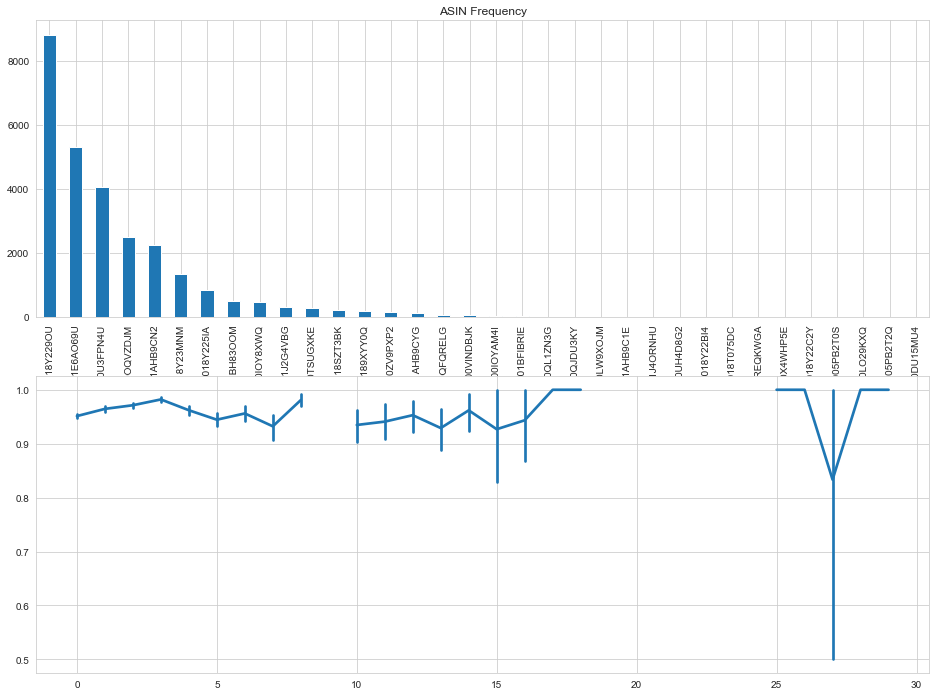

In [40]:
plt.subplots(2,1,figsize=(16,12))
plt.subplot(2,1,1)
reviews["asins"].value_counts().plot(kind="bar", title="ASIN Frequency")
plt.subplot(2,1,2)
sns.pointplot(x="asins",y="reviews.doRecommend",order=asinsc,data=reviews)
plt.show()

- From this analysis, we can see that the first 19 ASINs show that consumers recommend the product, which is consistent with the reviews.rating analysis, where the first 19 ASINs have good ratings between 4.0 to 5.0
- The remaining ASINs have fluctuating results due to lower sample size, which should not be considered

# Correlations

In [41]:
corr_matrix = reviews.corr()
corr_matrix

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
reviews.id,NaN,NaN,NaN,NaN,NaN
reviews.numHelpful,NaN,1.00000,-0.04199,NaN,NaN
reviews.rating,NaN,-0.04199,1.00000,NaN,NaN
reviews.userCity,NaN,NaN,NaN,NaN,NaN
reviews.userProvince,NaN,NaN,NaN,NaN,NaN


In [42]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27701 entries, 30050 to 3508
Data columns (total 21 columns):
id                      27675 non-null object
name                    22318 non-null object
asins                   27673 non-null object
brand                   27675 non-null object
categories              27675 non-null object
keys                    27675 non-null object
manufacturer            27675 non-null object
reviews.date            27652 non-null object
reviews.dateAdded       19232 non-null object
reviews.dateSeen        27675 non-null object
reviews.didPurchase     1 non-null object
reviews.doRecommend     27253 non-null object
reviews.id              1 non-null float64
reviews.numHelpful      27302 non-null float64
reviews.rating          27675 non-null float64
reviews.sourceURLs      27675 non-null object
reviews.text            27674 non-null object
reviews.title           27671 non-null object
reviews.userCity        0 non-null float64
reviews.userProvince  

In [43]:
counts = reviews["asins"].value_counts().to_frame()
counts.head()

,asins
B018Y229OU,8809
"B00L9EPT8O,B01E6AO69U",5312
B00U3FPN4U,4044
B00OQVZDJM,2509
B01AHB9CN2,2239


In [44]:
avg_rating = reviews.groupby("asins")["reviews.rating"].mean().to_frame()
avg_rating.head()

,reviews.rating
asins,
B005PB2T0S,4.333333
B005PB2T2Q,4.333333
B00DU15MU4,5.000000
B00IOY8XWQ,4.738854
B00IOYAM4I,4.906977


In [45]:
table = counts.join(avg_rating)
table.head(30)

,asins,reviews.rating
B018Y229OU,8809,4.456578
"B00L9EPT8O,B01E6AO69U",5312,4.677523
B00U3FPN4U,4044,4.704995
B00OQVZDJM,2509,4.767637
B01AHB9CN2,2239,4.574810
B018Y23MNM,1351,4.536640
B018Y225IA,843,4.513642
B01BH83OOM,490,4.544898
B00IOY8XWQ,471,4.738854
B01J2G4VBG,319,4.432602


,asins,reviews.rating
asins,1.000000,0.082424
reviews.rating,0.082424,1.000000


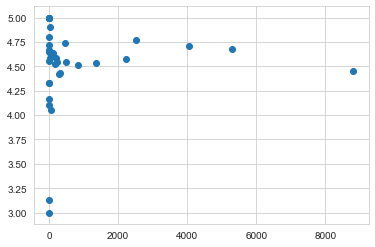

In [46]:
plt.scatter("asins", "reviews.rating", data=table)
table.corr()

From our analysis in data exploration above between ASINs and reviews.rating, we discovered that there are many ASINs with low occurrence that have high variances, as a result we concluded that theses low occurrence ASINs are not significant in our analysis given the low sample size.
<br>
<br>
Similarly in our correlation analysis between ASINs and reviews.rating, we see that there is almost no correlation which is consistent with our findings.

# Sentiment Analysis

## Set Target Variable (Sentiments)

In [47]:
def sentiments(rating):
    if (rating == 5) or (rating == 4):
        return "Positive"
    elif rating == 3:
        return "Neutral"
    elif (rating == 2) or (rating == 1):
        return "Negative"
strat_train["Sentiment"] = strat_train["reviews.rating"].apply(sentiments)
strat_test["Sentiment"] = strat_test["reviews.rating"].apply(sentiments)
strat_train["Sentiment"][:10]

30050    Positive
32823    Positive
23634    Positive
11298    Positive
26467    Positive
34155    Positive
34053    Positive
28786    Positive
19587     Neutral
11847    Positive
Name: Sentiment, dtype: object

In [48]:
X_train = strat_train["reviews.text"]
X_train_targetSentiment = strat_train["Sentiment"]
X_test = strat_test["reviews.text"]
X_test_targetSentiment = strat_test["Sentiment"]
print(len(X_train),len(X_test))

27701 6926


## Extract Features

In [49]:
X_train = X_train.fillna(' ')
X_test = X_test.fillna(' ')
X_train_targetSentiment = X_train_targetSentiment.fillna(' ')
X_test_targetSentiment = X_test_targetSentiment.fillna(' ')
from sklearn.feature_extraction.text import CountVectorizer 
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train) 
X_train_counts.shape

(27701, 12565)

In [50]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer(use_idf=False)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(27701, 12565)

## Building a Pipeline from the Extracted Features

In [51]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
clf_multiNB_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_nominalNB", MultinomialNB())])
clf_multiNB_pipe.fit(X_train, X_train_targetSentiment)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf_nominalNB', MultinomialNB())])

In [52]:
import numpy as np
predictedMultiNB = clf_multiNB_pipe.predict(X_test)
np.mean(predictedMultiNB == X_test_targetSentiment)

0.9291077100779671

## Testing Other Models

**Logistic Regression Classifier**

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
clf_logReg_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_logReg", LogisticRegression())])
clf_logReg_pipe.fit(X_train, X_train_targetSentiment)

import numpy as np
predictedLogReg = clf_logReg_pipe.predict(X_test)
np.mean(predictedLogReg == X_test_targetSentiment)

0.9324285301761478

**Support Vector Machine Classifier**

In [54]:
from sklearn.svm import LinearSVC
clf_linearSVC_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_linearSVC", LinearSVC())])
clf_linearSVC_pipe.fit(X_train, X_train_targetSentiment)

predictedLinearSVC = clf_linearSVC_pipe.predict(X_test)
np.mean(predictedLinearSVC == X_test_targetSentiment)

0.9328616806237366

**Decision Tree Classifier**

In [55]:
from sklearn.tree import DecisionTreeClassifier
clf_decisionTree_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), 
                                  ("clf_decisionTree", DecisionTreeClassifier())])
clf_decisionTree_pipe.fit(X_train, X_train_targetSentiment)

predictedDecisionTree = clf_decisionTree_pipe.predict(X_test)
np.mean(predictedDecisionTree == X_test_targetSentiment)

0.8983540282991626

**Random Forest Classifier**

In [56]:
from sklearn.ensemble import RandomForestClassifier
clf_randomForest_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_randomForest", RandomForestClassifier())])
clf_randomForest_pipe.fit(X_train, X_train_targetSentiment)

predictedRandomForest = clf_randomForest_pipe.predict(X_test)
np.mean(predictedRandomForest == X_test_targetSentiment)

0.9293964770430263

Looks like all the models almost performed very well (>90%), and we will use the **Support Vector Machine Classifier** since it has the highest accuracy level at **93.28%**.

## Fine tuning the Support Vector Machine Classifier

In [57]:
from sklearn.model_selection import GridSearchCV
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],    
             'tfidf__use_idf': (True, False), 
             } 
gs_clf_LinearSVC_pipe = GridSearchCV(clf_linearSVC_pipe, parameters, n_jobs=-1)
gs_clf_LinearSVC_pipe = gs_clf_LinearSVC_pipe.fit(X_train, X_train_targetSentiment)

In [58]:
predictedGS_clf_LinearSVC_pipe = gs_clf_LinearSVC_pipe.predict(X_test)
np.mean(predictedGS_clf_LinearSVC_pipe == X_test_targetSentiment)

0.9354605833092694

In [59]:
new_text = ["The tablet is good, really liked it.",
            "The tablet is average",
            "The tablet is not good, does not work very well."]
X_train_targetSentiment[gs_clf_LinearSVC_pipe.predict(new_text)]

Positive    NaN
Neutral     NaN
Negative    NaN
Name: Sentiment, dtype: object

**Results:**
- After testing some arbitrary reviews, it seems that our features is performing correctly with the inputs provided by us.
- We also see that after running the grid search, our Support Vector Machine Classifier has improved to **93.546%** accuracy level

## Analysis of Support Vector Machine Classifier

In [60]:
for performance_analysis in (gs_clf_LinearSVC_pipe.best_score_, 
                             gs_clf_LinearSVC_pipe.best_estimator_, 
                             gs_clf_LinearSVC_pipe.best_params_):
        print(performance_analysis)

0.9392079783328349
Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer(use_idf=False)),
                ('clf_linearSVC', LinearSVC())])
{'tfidf__use_idf': False, 'vect__ngram_range': (1, 2)}


- Here we see that the best mean score of the grid search is 93.92%.
- Our best estimator here is also displayed
- Lastly, our best parameters are false for use_idf in tfidf, and ngram_range between 1,2

In [61]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print(classification_report(X_test_targetSentiment, predictedGS_clf_LinearSVC_pipe))
print('Accuracy: {}'. format(accuracy_score(X_test_targetSentiment, predictedGS_clf_LinearSVC_pipe)))

              precision    recall  f1-score   support

                   0.00      0.00      0.00         7
    Negative       0.65      0.23      0.34       172
     Neutral       0.46      0.09      0.15       313
    Positive       0.94      1.00      0.97      6434

    accuracy                           0.94      6926
   macro avg       0.51      0.33      0.37      6926
weighted avg       0.91      0.94      0.92      6926

Accuracy: 0.9354605833092694


In [62]:
from sklearn import metrics
metrics.confusion_matrix(X_test_targetSentiment, predictedGS_clf_LinearSVC_pipe)

array([[   0,    0,    0,    7],
       [   0,   40,   15,  117],
       [   0,   17,   29,  267],
       [   0,    5,   19, 6410]], dtype=int64)